<h1>Context</h1>

  <p>Understanding data requires analyzing different statistical parameters. Based on the given dataset, here’s how you can interpret key aspects:</p>
        <ul>
            <li><strong>Age:</strong> Analyze the range (min 13, max 88) and mean (51.6) to understand the patient demographics.</li>
            <li><strong>Billing Amount:</strong> Identify anomalies like negative values, which may indicate refunds or errors.</li>
            <li><strong>Room Number:</strong> Study its distribution to understand hospital structure and patient accommodation.</li>
            <li><strong>Hospital Stay Duration:</strong> Look for inconsistencies like negative values and extreme variations.</li>
            <li><strong>Admission Year, Month, and Weekday:</strong> Identify trends and seasonality in hospital admissions.</li>
        </ul>
        <p>By examining these parameters, we can detect patterns, trends, and potential data issues.</p>

<h2>Exploratory Data Analysis (EDA) Project</h2>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3>Load the Data</h3>

In [ ]:
df = pd.read_csv("/content/cleaned_healthcare_data.csv")

 *Displaying the First Five Rows*

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,hospital_stay_duration,age_group,admission_year,admission_month,admission_weekday,hospital_category
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Urgent,2024-02-02,Paracetamol,Normal,2,Child,2024,1,2,Very High
1,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Emergency,2022-07-10,Aspirin,Normal,-74,Senior,2022,9,3,Very High
2,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Urgent,2022-09-10,Penicillin,Abnormal,-9,Adult,2022,9,0,Medium
3,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,...,Emergency,2022-07-01,Paracetamol,Inconclusive,185,Child,2021,12,1,Very High
4,aaRon MARtiNeZ,38,Female,A-,Hypertension,2023-08-13,Douglas Mayo,Lyons-Blair,Medicare,7999.586880,...,Urgent,2023-05-09,Lipitor,Inconclusive,-96,Child,2023,8,6,Low


*Checking for Missing Values in the Dataset*

In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


*The `df.shape` attribute provides the number of rows and columns in the dataset*

In [ ]:
df.shape

(21483, 21)

*The `df.info()` function provides a summary of the dataset, including the number of non-null values, data types of each column, and memory usage*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21483 entries, 0 to 21482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    21483 non-null  object 
 1   Age                     21483 non-null  int64  
 2   Gender                  21483 non-null  object 
 3   Blood Type              21483 non-null  object 
 4   Medical Condition       21483 non-null  object 
 5   Date of Admission       21483 non-null  object 
 6   Doctor                  21483 non-null  object 
 7   Hospital                21483 non-null  object 
 8   Insurance Provider      21483 non-null  object 
 9   Billing Amount          21483 non-null  float64
 10  Room Number             21483 non-null  int64  
 11  Admission Type          21483 non-null  object 
 12  Discharge Date          21483 non-null  object 
 13  Medication              21483 non-null  object 
 14  Test Results            21483 non-null

*Removing Duplicate Records*

<h3>Handle Missing and Duplicate Data</h3>

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

* Counting Unique Values in Each Column*

In [ ]:
print(df.nunique())

Name                      19538
Age                          76
Gender                        2
Blood Type                    8
Medical Condition             6
Date of Admission          1827
Doctor                    17573
Hospital                  17003
Insurance Provider            5
Billing Amount            19540
Room Number                 400
Admission Type                3
Discharge Date              730
Medication                    5
Test Results                  3
hospital_stay_duration      677
age_group                     4
admission_year                6
admission_month              12
admission_weekday             7
hospital_category             4
dtype: int64


*The `df.duplicated().sum()` function returns the total number of duplicate rows in the dataset*

In [ ]:
print(df.duplicated().sum())

0


*The df.shape attribute provides the number of rows and columns in the dataset*

In [ ]:
df.shape

(21483, 21)

*Statistical Summary of the Dataset*

In [ ]:
df.describe()

,Age,Billing Amount,Room Number,hospital_stay_duration,admission_year,admission_month,admission_weekday
count,21483.000000,21483.000000,21483.000000,21483.000000,21483.000000,21483.000000,21483.000000
mean,51.621887,25638.828126,301.002281,15.347298,2021.334683,6.521529,2.992692
std,19.537740,14145.796430,115.354457,143.249211,1.503892,3.432030,2.002813
min,13.000000,-1660.009373,101.000000,-322.000000,2019.000000,1.000000,0.000000
25%,35.000000,13481.807680,202.000000,-88.000000,2020.000000,4.000000,1.000000
50%,52.000000,25721.518077,302.000000,16.000000,2021.000000,7.000000,3.000000
75%,68.000000,37778.010633,400.000000,118.000000,2023.000000,9.000000,5.000000
max,88.000000,52764.276736,500.000000,354.000000,2024.000000,12.000000,6.000000


* Handling Missing Values in Categorical Columns*

In [ ]:
#no. of missing value is large ->mode
#no. of missing value is less ->mean
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].mean(), inplace=True)

*Converting Date Columns to Datetime Format*

<h3>Feature Engineering</h3>

In [ ]:
# Convert date columns to datetime format
date_columns = ['Date of Admission', 'Discharge Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

*List of Date Columns*

In [ ]:
date_columns

['Date of Admission', 'Discharge Date']

*Removing Rows with Missing Date Values*

In [ ]:
# Drop rows with invalid dates
df = df.dropna(subset=date_columns)

*The df.shape attribute provides the number of rows and columns in the dataset*

In [ ]:
df.shape

(21483, 21)

**Feature Engineering and Data Transformation**

*These transformations provide insights into patient demographics, hospital performance, and medical trends.*


In [ ]:
df['hospital_stay_duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['age_group'] = pd.cut(df['Age'], bins=[ 10, 40, 50, 60,100], labels=['Child',  'Adult', 'Middle Age', 'Senior'])
df['admission_year'] = df['Date of Admission'].dt.year
df['admission_month'] = df['Date of Admission'].dt.month
df['admission_weekday'] = df['Date of Admission'].dt.weekday
total_billing_by_hospital = df.groupby('Hospital')['Billing Amount'].sum()
department_categories = pd.qcut(total_billing_by_hospital, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['hospital_category'] = df['Hospital'].map(department_categories)
avg_stay_duration_by_medical_condition = df.groupby('Medical Condition')['hospital_stay_duration'].mean().sort_values(
    ascending=False)
patients_by_medication_category = df.groupby('Medical Condition')['age_group'].nunique().sort_values(ascending=False)


* Visualizing Numerical Feature Distributions

This loop generates histogram plots for selected numerical columns to analyze their distributions:*

<h3>Univariate Analysis</h3>

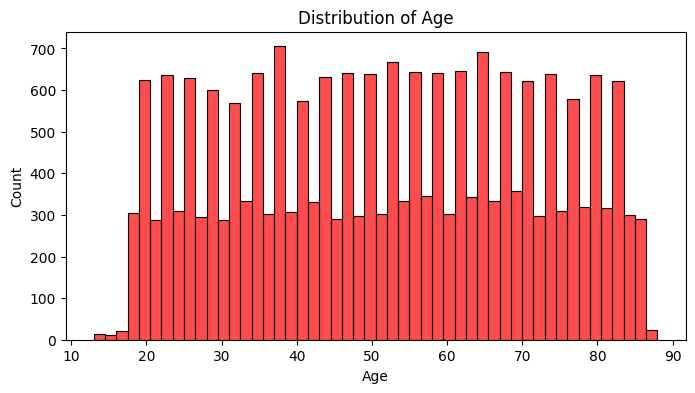

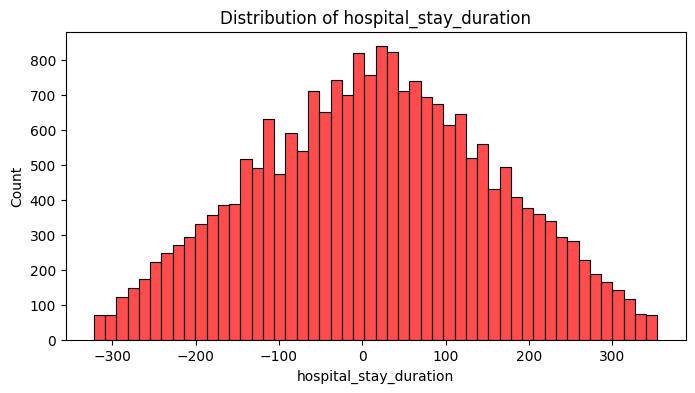

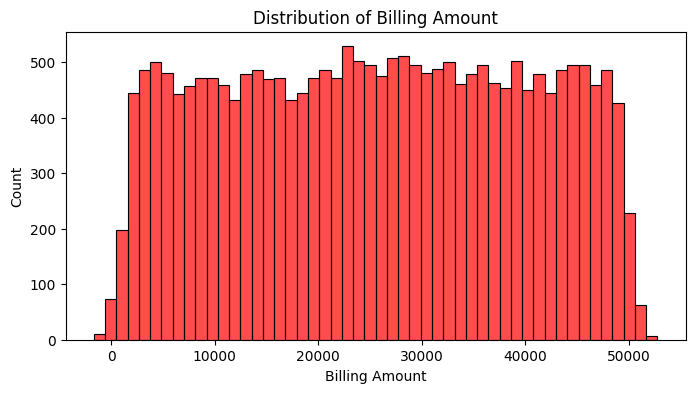

In [ ]:
numerical_cols = ['Age', 'hospital_stay_duration', 'Billing Amount']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col],color='r', bins=50, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.show()

*These visualizations help identify dominant categories, potential data imbalances, and trends in categorical attributes.*

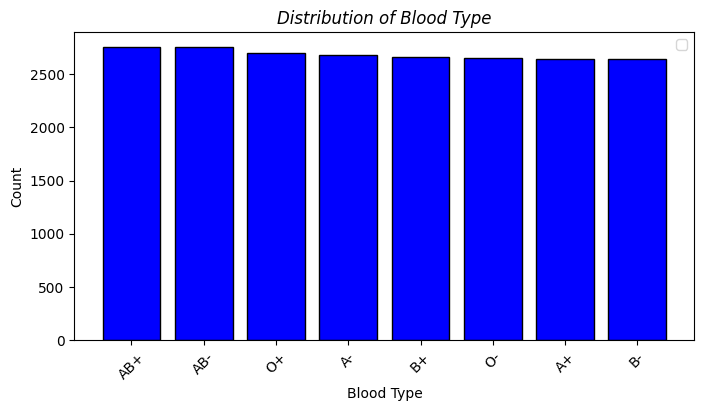

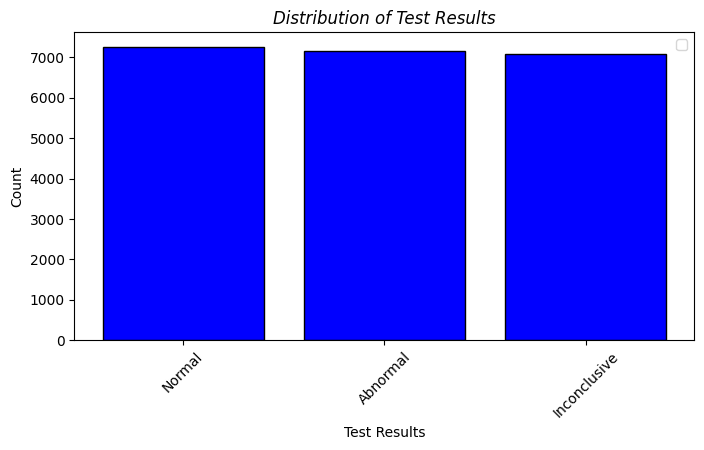

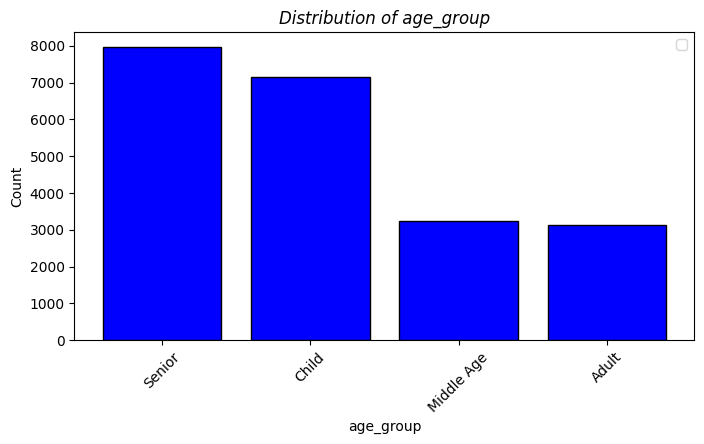

In [ ]:
categorical_cols = [ 'Blood Type', 'Test Results', 'age_group']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    value_counts = df[col].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')
    plt.title(f"Distribution of {col}", style='italic')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


*Treatment by Age Group*

*This bar plot visualizes the average age within each age group. It helps in understanding the distribution of treatments across different age categories, providing insights into which age groups require more medical attention*

<h3>Bivariate Analysis</h3>

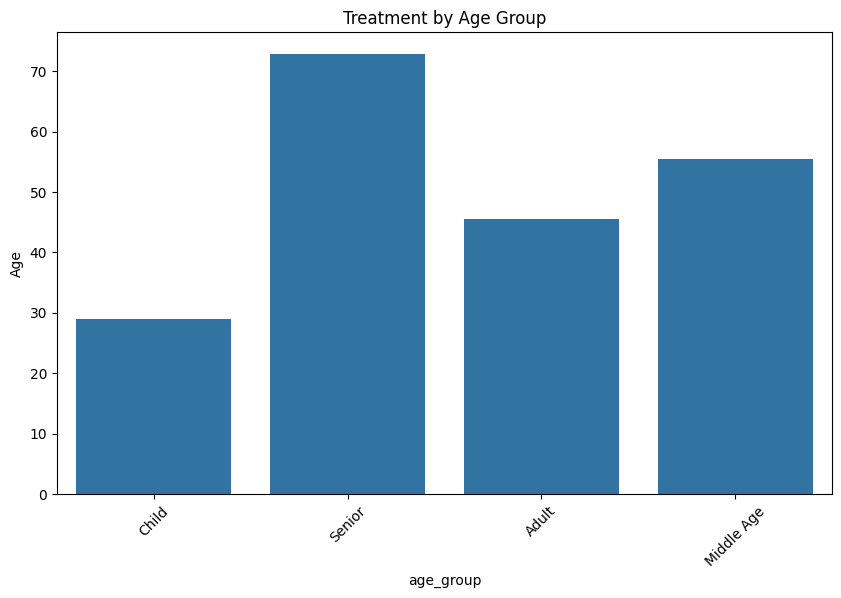

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Age', data=df, ci=None)
plt.title("Treatment by Age Group")
plt.xticks(rotation=45)
plt.show()


*Billing Amount by Insurance Provider*

*This violin plot visualizes the distribution of billing amounts across different insurance providers. It helps in understanding variations in medical expenses and identifying potential discrepancies or trends among insurance companies.*

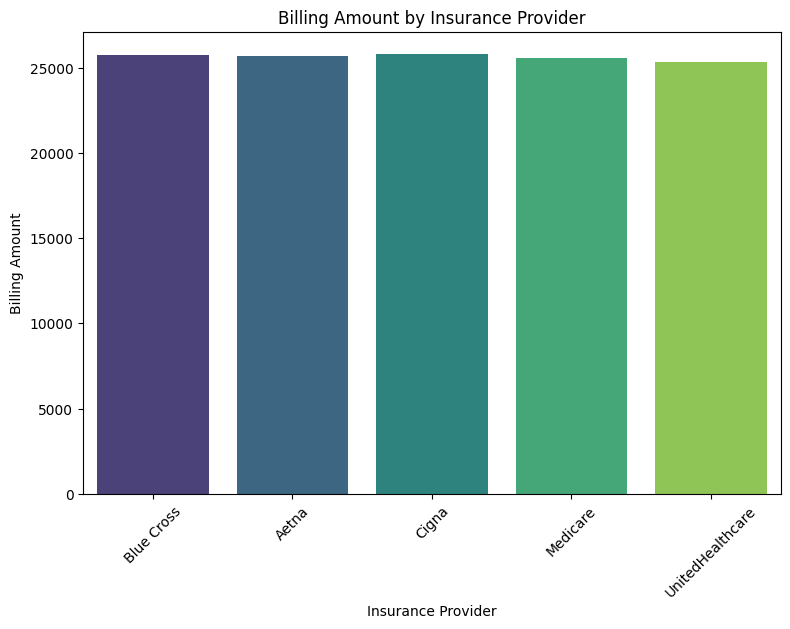

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=df, ci=None, palette='viridis')
plt.title("Billing Amount by Insurance Provider")
plt.xticks(rotation=45)
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount")
plt.show()

*Admissions by Month*

*This bar plot visualizes the number of hospital admissions for each month across different years. It helps in identifying seasonal trends in patient admissions and potential patterns in healthcare demand.*

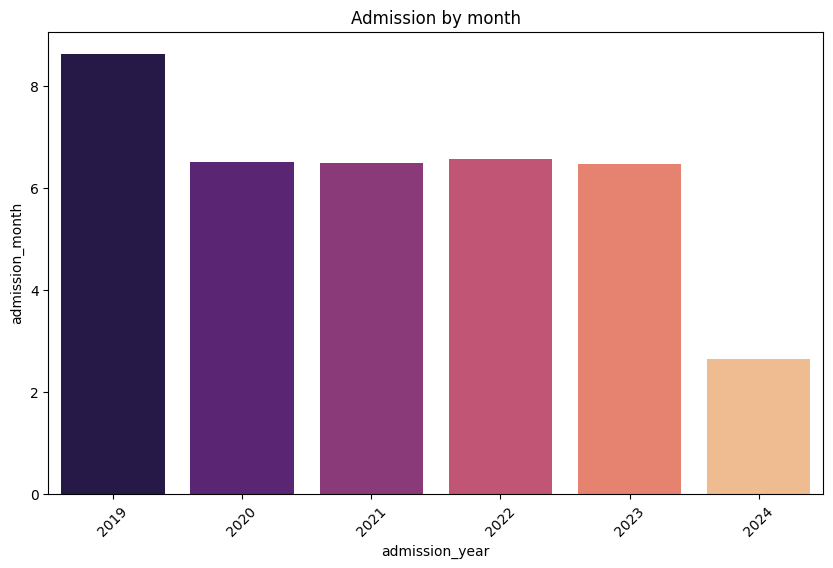

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='admission_year', y='admission_month', data=df, ci=None,palette='magma')
plt.title("Admission by month")
plt.xticks(rotation=45)
plt.show()

*Hospital Stay Duration by Age Group*

*This bar plot visualizes the average hospital stay duration for each age group. It helps in understanding how hospital stays vary among different age categories, providing insights into healthcare needs across demographics.*

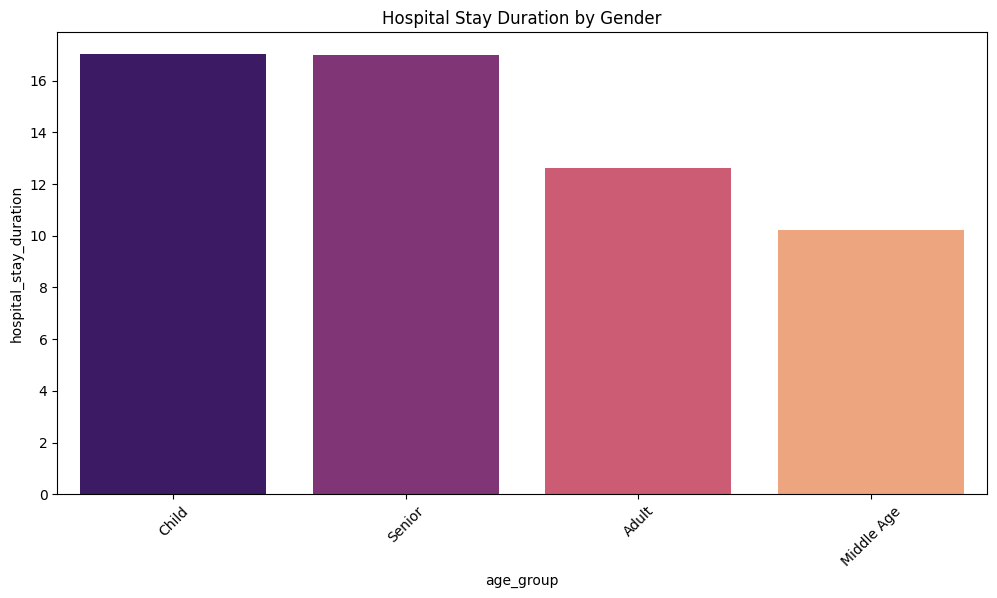

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='hospital_stay_duration', data=df, ci=None,palette='magma')
plt.title("Hospital Stay Duration by Gender")
plt.xticks(rotation=45)
plt.show()